In [56]:
# %matplotlib notebook

import numpy as np
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


import warnings


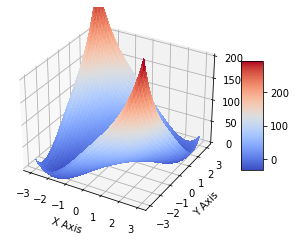

In [57]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

x = y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = X ** 4 + Y ** 4 - 16 * X * Y

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_zlim(0, 200)
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

plt.show()

In [58]:
def E(u, v): return u ** 4 + v ** 4 - 16 * u * v

eta = 0.01
x, y = 1.2, 1.2
print(0, f'x={x}', f'y={y}', f'E={E(x, y)}', sep='\t \t')
for i in range(1, 31):
    g = 4 * x ** 3 - 16 * y
    h = 4 * y ** 3 - 16 * x
    x = x - eta * g
    y = y - eta * h
    # print(i, f'x={round(x, 3)}', f'y={round(y, 3)}', f'E={round(E(x, y), 3)}', sep='\t \t')
print(i, f'x={round(x, 3)}', f'y={round(y, 3)}', f'E={round(E(x, y), 3)}', sep='\t \t')

0	 	x=1.2	 	y=1.2	 	E=-18.8928
30	 	x=2.0	 	y=2.0	 	E=-32.0


In [72]:
def sigmoid(x: float) -> float:
    return 1 / (1 + np.exp(-x))

In [60]:
# Import Data
filename = r'D:\MATH3094\data\multivar_simulated\data.csv'
data = np.genfromtxt(filename, skip_header=1, delimiter=',')

Y = data[:, 1]
X1 = data[:, 2:]
X = np.concatenate([X1, np.ones(shape=(X1.shape[0], 1))], axis=1)

The error function is given by
$$ E = \sum_{j=1}^{N} (y_j-\sum_{s=1}^{k+1} x_{js}m_{s})^2 .$$

In [61]:
def squared_error(actuals, *, predicted=None, predictors=None, linear_weights=None) -> float:
    """
    Calculates the Squared Error

    Either the predicted values or the model_inputs and weights need to be supplied
    :param actuals: A numpy ndarray of actual values
    :param predicted: A numpy ndarray of predictions
    :param predictors: A numpy ndarray of predictors
    :param linear_weights: The weights for a linear model for the predictors
    :return: The squared error
    """
    if predicted is not None:
        try:
            return np.square(predicted - actuals).sum()
        except:
            warnings.warn('There was an error')
            return np.inf
    elif (predictors is not None) and (linear_weights is not None):
        try:
            return np.square(actuals - np.matmul(predictors, linear_weights)).sum()
        except:
            warnings.warn('There was an error')
            return np.inf
    else:
        raise ValueError

The gradient of $E$ is given by
$$ \nabla E  = -2 X^{\intercal}Y + 2
X^{\intercal}XM. $$

In [86]:
def get_gradient_linear(actuals, predictors, linear_weights):
    """
    Calculates the gradient
    :return: The gradient
    """
    if not isinstance(actuals, np.ndarray):
        raise ValueError
    if not isinstance(predictors, np.ndarray):
        raise ValueError
    if not isinstance(linear_weights, np.ndarray):
        raise ValueError
    try:
        return 2 * (np.matmul(np.matmul(predictors.transpose(), predictors), linear_weights)
                    - np.matmul(predictors.transpose(), actuals))
    except:
        warnings.warn('There was an error')
        return linear_weights * np.inf

In [63]:
# Now we run this
step_size = 0.0001
number_of_steps = 100000
model_weights = np.array([1, 1, 1], dtype=np.dtype(float))

initial_error = squared_error(Y, predictors=X, linear_weights=model_weights)
print(initial_error)

13157.654112000984


In [64]:
for _ in range(number_of_steps):
    # We calculate the gradient
    # Then we move in that direction in our step size
    model_weights -= step_size * get_gradient_linear(Y, X, model_weights)
print(model_weights)
print(squared_error(Y, predictors=X, linear_weights=model_weights))

[ 1.78777492 -3.47899986  6.0608333 ]
77.72956041736886


## Newton's Method

In [65]:
def E(u, v): return u ** 4 + v ** 4 - 16 * u * v


eta = 1
x, y = 1.2, 1.2
print(0, f'x={x}', f'y={y}', f'E={E(x, y)}', sep='\t\t')
for i in range(0, 10):
    d = 9 * x ** 2 * y ** 2 - 16
    g = (3 * x ** 3 * y ** 2 - 8 * y ** 3 - 16 * x) / d
    h = (3 * x ** 2 * y ** 3 - 8 * x ** 3 - 16 * y) / d
    x = x - eta * g
    y = y - eta * h
    print(i + 1, f'x={np.round(x, 3)}', f'y={np.round(y, 3)}', f'E={np.round(E(x, y))}', sep='\t\t')

0		x=1.2		y=1.2		E=-18.8928
1		x=10.8		y=10.8		E=25344.0
2		x=7.283		y=7.283		E=4779.0
3		x=4.981		y=4.981		E=834.0
4		x=3.509		y=3.509		E=106.0
5		x=2.623		y=2.623		E=-15.0
6		x=2.169		y=2.169		E=-31.0
7		x=2.018		y=2.018		E=-32.0
8		x=2.0		y=2.0		E=-32.0
9		x=2.0		y=2.0		E=-32.0
10		x=2.0		y=2.0		E=-32.0


### Haberman's Survival Data Set

https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

In [66]:
filepath = r'D:\MATH3094\data\haberman.data'
df = pd.read_csv(filepath, header=None)

In [67]:
# Load Data
mydata = np.genfromtxt(filepath, delimiter=',')
X = mydata[:, 0:3]
Y = mydata[:, -1]

In [68]:
# Add column of ones
X = np.concatenate([X, np.ones(shape=(X.shape[0], 1))], axis=1)

In [69]:
# Convert target to 0-1 (1 died within 5 years, 0 died after 5 years)
Y = Y % 2

In [70]:
# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
n_train = X_train.shape[0]
n_test = X_test.shape[0]

In [76]:
# Define the error function
def logistic_squared_error(actuals, *, predicted=None, predictors=None, weights=None) -> float:
    """
            Calculates the error for logistic regression
            My math does not match the math in the answer key
            The answer does 2-y_train, why is that correct?


            Either the predicted values or the model_inputs and weights need to be supplied
            :param actuals: A numpy ndarray of actual values
            :param predicted: A numpy ndarray of predictions
            :param predictors: A numpy ndarray of predictors
            :param linear_weights: The weights for a linear model for the predictors
            :return: The squared error
            """
    if predicted is not None:
        pass
    elif (predictors is not None) and (weights is not None):
        try:
            predicted = np.matmul(predictors, weights)
        except:
            warnings.warn('There was an error')
            return np.inf
    else:
        raise ValueError
    y_n = sigmoid(predicted)
    t_n = actuals.flatten()
    return -1 / predicted.shape[0] * np.sum((t_n * y_n) + (1 - t_n) * np.log(1 - y_n))

w=np.array([1, 1, 1, 1])
logistic_squared_error(Y_train, predictors=X_train, weights=w)


-0.15432184488450182

In [79]:
# Define the gradient

def logistic_squared_gradient(actuals, predictors, weights):
    if not isinstance(actuals, np.ndarray):
        raise ValueError
    if not isinstance(predictors, np.ndarray):
        raise ValueError
    if not isinstance(weights, np.ndarray):
        raise ValueError
    y_n = sigmoid(np.matmul(predictors, weights))
    t_n = actuals.flatten()
    return 1 / predictors.shape[0] * np.matmul(np.transpose(predictors), (y_n - t_n))

logistic_squared_gradient(Y_train, X_train, w)


array([-1.08878505e+01, -1.32546729e+01,  9.34579439e-03, -2.10280374e-01])

In [85]:
model_weights = np.array([1, 1, 1, 1], dtype=np.dtype(float))
step_size = 0.0005
number_of_steps = 100000


eta=0.0005
iter_num=10

initial_error = logistic_squared_error(Y_train, predictors=X_train, weights=model_weights)
print(initial_error)

for i in range(number_of_steps):
    # print(logistic_squared_gradient(Y_train, X_train, model_weights))
    model_weights -= step_size * logistic_squared_gradient(Y_train, X_train, model_weights)
    print(model_weights)

    if i % 1000 == 0:
        print(w,logistic_squared_error(Y_train, predictors=X_train, weights=model_weights))

print(model_weights)
print(logistic_squared_error(Y, predictors=X, weights=model_weights))

<ipython-input-76-1a4506135514>:28: RuntimeWarning: divide by zero encountered in log
  return -1 / predicted.shape[0] * np.sum((t_n * y_n) + (1 - t_n) * np.log(1 - y_n))
<ipython-input-76-1a4506135514>:28: RuntimeWarning: invalid value encountered in multiply
  return -1 / predicted.shape[0] * np.sum((t_n * y_n) + (1 - t_n) * np.log(1 - y_n))


nan
[0.99239252 0.99090421 0.99886215 0.99985514]
[0 0 0 0] nan
[0.98478505 0.98180841 0.9977243  0.99971028]
[0.97717757 0.97271262 0.99658645 0.99956542]
[0.96957009 0.96361682 0.9954486  0.99942056]
[0.96196262 0.95452103 0.99431075 0.9992757 ]
[0.95435514 0.94542523 0.9931729  0.99913084]
[0.94674766 0.93632944 0.99203505 0.99898598]
[0.93914019 0.92723364 0.9908972  0.99884112]
[0.93153271 0.91813785 0.98975935 0.99869626]
[0.92392523 0.90904206 0.9886215  0.9985514 ]
[0.91631776 0.89994626 0.98748364 0.99840654]
[0.90871028 0.89085047 0.98634579 0.99826168]
[0.9011028  0.88175467 0.98520794 0.99811682]
[0.89349533 0.87265888 0.98407009 0.99797196]
[0.88588785 0.86356308 0.98293224 0.9978271 ]
[0.87828037 0.85446729 0.98179439 0.99768224]
[0.8706729  0.8453715  0.98065654 0.99753738]
[0.86306542 0.8362757  0.97951869 0.99739252]
[0.85545794 0.82717991 0.97838084 0.99724766]
[0.84785047 0.81808411 0.97724299 0.9971028 ]
[0.84024299 0.80898832 0.97610514 0.99695794]
[0.83263551 0.79